# **Getting dataset**
from Kaggle to Colab using **API Token**<br>
Link to dataset: https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [1]:
# !kaggle datasets download -d salader/dogs-vs-cats

In [2]:
# import zipfile as zf
# zipRef = zf.ZipFile('/content/dogs-vs-cats.zip', 'r')
# zipRef.extractall('/content')
# zipRef.close()

Dataset imported from Kaggle to Colab<br>

# **Importing Libraries and Loading Dataset**

In [3]:
# Importing Libraries

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [4]:
# Creating Generators - Easier to compute in batches instead of entire dataset at once

trainDs = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validationDs = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


## Normalising Data

In [5]:
# Normalizing - Keeping pixel vales between 0 and 1, instead of 0 and 255

def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

trainDs, validationDs = trainDs.map(process), validationDs.map(process)

## Visualising Data

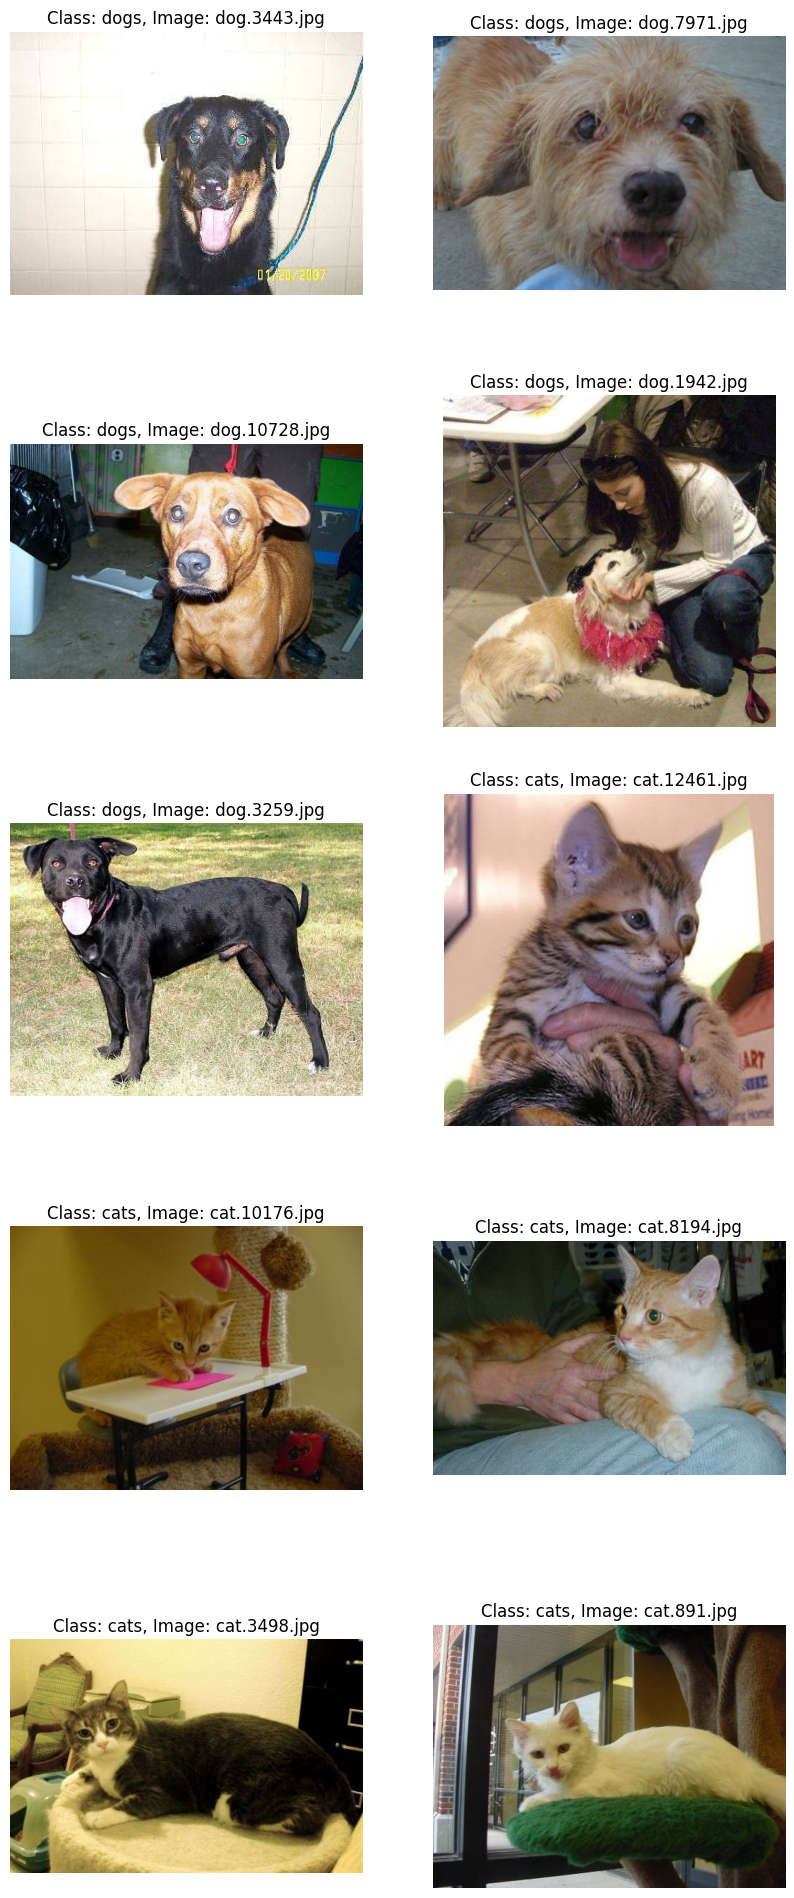

In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

mainFolder = '/kaggle/input/dogs-vs-cats/train'

plt.figure(figsize = (10, 25))

i = 1
for subfolder in os.listdir(mainFolder):
    subfolderPath = os.path.join(mainFolder, subfolder)
    if os.path.isdir(subfolderPath):
        for imageFile in os.listdir(subfolderPath)[:5]: # Displaying images from the subfolder
            plt.subplot(5, 2, i)
            imagePath = os.path.join(subfolderPath, imageFile)
            img = mpimg.imread(imagePath)
            plt.imshow(img)
            plt.title(f'Class: {subfolder}, Image: {imageFile}')
            plt.axis('off')
            i += 1

plt.show()

# **Simple CNNs**

## CNN Model #1

Sequential models have a linear stack of layers. Each layer in the model is added sequentially, one after another. Here're some common layers used in CNNs:

- Conv2D Layers: These layers apply convolution operations to the input images. Convolutions help in detecting features like edges, textures, and patterns.
- MaxPooling2D Layers: These layers downsample the feature maps by taking the maximum value in each region, reducing the spatial dimensions.
- Flatten Layer: This layer flattens the 2D feature maps into a 1D vector, preparing it for the dense (fully connected) layers.
- Dense Layers (Fully Connected Layers):

    - The first dense layer learns complex patterns from the flattened features.
    - Further dense layers refine the learned features.
    - The final dense layer outputs a probability (between 0 and 1) that the image belongs to one of the two classes (cats or dogs). 
    
In this simple neural network, we have:

1. 3 Convolutional layers with 32, 64, and 128 filters respectively,

2. a Pooling layer just after every convolutional layer,

3. a Flatten layer,

4. and 3 Dense layers, last one being the output.

In [7]:
cnn1 = Sequential()

cnn1.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
cnn1.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

cnn1.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu')) # Input shape inferred
cnn1.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

cnn1.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
cnn1.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

cnn1.add(Flatten())

cnn1.add(Dense(128, activation = 'relu'))
cnn1.add(Dense(64, activation = 'relu'))
cnn1.add(Dense(1, activation = 'sigmoid')) # Output layer

cnn1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # Compiling model

history1 = cnn1.fit(trainDs, epochs = 20, validation_data = validationDs)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1724478747.657920     113 service.cc:145] XLA service 0x786350005850 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724478747.657974     113 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1724478747.657979     113 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  3/625 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - accuracy: 0.4809 - loss: 1.4337

I0000 00:00:1724478754.533924     113 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 65ms/step - accuracy: 0.5948 - loss: 0.6835 - val_accuracy: 0.7496 - val_loss: 0.5231
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.7512 - loss: 0.5020 - val_accuracy: 0.7678 - val_loss: 0.4838
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 57ms/step - accuracy: 0.8107 - loss: 0.4116 - val_accuracy: 0.7878 - val_loss: 0.4913
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.8673 - loss: 0.3043 - val_accuracy: 0.7824 - val_loss: 0.5826
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 57ms/step - accuracy: 0.9345 - loss: 0.1691 - val_accuracy: 0.7740 - val_loss: 0.8723
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 57ms/step - accuracy: 0.9672 - loss: 0.0903 - val_accuracy: 0.7842 - val_loss: 1.0556
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 57ms/step - accuracy: 0.9750 - loss: 0.0667 - val_accuracy: 0.7952 - val_loss: 1.1625
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 57ms/step - accuracy: 0.9868 - loss: 0.0449 - val_accurac

## CNN Model #2

- adding batch normalisation and drop out layer to CNN Model #1
- gives better accuracy due to these two layers

(other methods of making better models - L1/L2 regularisation, more data, less complex model, data augmentation, and more)

In [8]:
cnn2 = Sequential()

cnn2.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
cnn2.add(BatchNormalization())
cnn2.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

cnn2.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu')) # Input shape inferred
cnn2.add(BatchNormalization())
cnn2.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

cnn2.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
cnn2.add(BatchNormalization())
cnn2.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

cnn2.add(Flatten())

cnn2.add(Dense(128, activation = 'relu'))
cnn2.add(Dropout(0.1))
cnn2.add(Dense(64, activation = 'relu'))
cnn2.add(Dropout(0.1))
cnn2.add(Dense(1, activation = 'sigmoid')) # Output layer

cnn2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history2 = cnn2.fit(trainDs, epochs = 20, validation_data = validationDs)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 72ms/step - accuracy: 0.5727 - loss: 2.5092 - val_accuracy: 0.6662 - val_loss: 0.6358
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.6704 - loss: 0.6043 - val_accuracy: 0.7326 - val_loss: 0.5365
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.7329 - loss: 0.5195 - val_accuracy: 0.7458 - val_loss: 0.5235
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.7726 - loss: 0.4689 - val_accuracy: 0.7584 - val_loss: 0.4987
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.8204 - loss: 0.4034 - val_accuracy: 0.8044 - val_loss: 0.4457
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.8581 - loss: 0.3307 - val_accuracy: 0.7824 - val_loss: 0.5021
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.8903 - loss: 0.2636 - val_accuracy: 0.7948 - val_loss: 0.5454
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.9296 - loss: 0.1810 - 

## CNN Model #3
- Added L1 regularisation to the dense layers
- Added another dense layer with 32 filters, just before the output dense layer

In [9]:
cnn3 = Sequential()

cnn3.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
cnn3.add(BatchNormalization())
cnn3.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

cnn3.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu')) # Input shape inferred
cnn3.add(BatchNormalization())
cnn3.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

cnn3.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
cnn3.add(BatchNormalization())
cnn3.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l1(0.0001)))
cnn3.add(Dropout(0.1))
cnn3.add(Dense(64, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l1(0.0001)))
cnn3.add(Dropout(0.1))
cnn3.add(Dense(32, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l1(0.0001)))
cnn3.add(Dropout(0.1))
cnn3.add(Dense(1, activation = 'sigmoid')) # Output layer

cnn3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history3 = cnn3.fit(trainDs, epochs = 20, validation_data = validationDs)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 73ms/step - accuracy: 0.5563 - loss: 7.7219 - val_accuracy: 0.5026 - val_loss: 2.3630
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.6410 - loss: 2.1137 - val_accuracy: 0.6326 - val_loss: 1.9008
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.7015 - loss: 1.7054 - val_accuracy: 0.6988 - val_loss: 1.7363
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.7422 - loss: 1.5660 - val_accuracy: 0.7500 - val_loss: 1.5478
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.7872 - loss: 1.5345 - val_accuracy: 0.8114 - val_loss: 1.7484
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.8113 - loss: 1.7242 - val_accuracy: 0.8072 - val_loss: 1.7572
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.8447 - loss: 1.8700 - val_accuracy: 0.8028 - val_loss: 1.8607
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.8731 - loss: 1.7353 - 

## CNN Model #4
- Added L2 regularisation to the dense layers

In [10]:
cnn4 = Sequential()

cnn4.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

cnn4.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu')) # Input shape inferred
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

cnn4.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

cnn4.add(Flatten())

cnn4.add(Dense(128, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.03)))
cnn4.add(Dropout(0.1))
cnn4.add(Dense(64, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.03)))
cnn4.add(Dropout(0.1))
cnn4.add(Dense(32, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.03)))
cnn4.add(Dropout(0.1))
cnn4.add(Dense(1, activation = 'sigmoid')) # Output layer

cnn4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history4 = cnn4.fit(trainDs, epochs = 20, validation_data = validationDs)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 73ms/step - accuracy: 0.5604 - loss: 10.2745 - val_accuracy: 0.5732 - val_loss: 2.5876
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.6431 - loss: 1.8928 - val_accuracy: 0.5384 - val_loss: 1.8518
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.6968 - loss: 1.0905 - val_accuracy: 0.7150 - val_loss: 0.8618
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.7271 - loss: 0.8572 - val_accuracy: 0.6712 - val_loss: 0.8872
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.7468 - loss: 0.8025 - val_accuracy: 0.7082 - val_loss: 0.8669
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - accuracy: 0.7689 - loss: 0.8611 - val_accuracy: 0.7220 - val_loss: 1.0540
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - accuracy: 0.7845 - loss: 0.9357 - val_accuracy: 0.7826 - val_loss: 1.1697
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - accuracy: 0.8033 - loss: 1.0714 -

## CNN Model #5
- most complex CNN model yet, with additional convolutional and dense layers
- L2 regularisation

In [11]:
cnn5 = Sequential()

cnn5.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
cnn5.add(BatchNormalization())
cnn5.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

cnn5.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu')) # Input shape inferred
cnn5.add(BatchNormalization())
cnn5.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

cnn5.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
cnn5.add(BatchNormalization())
cnn5.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

cnn5.add(Conv2D(256, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
cnn5.add(BatchNormalization())
cnn5.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

cnn5.add(Flatten())

cnn5.add(Dense(256, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.03)))
cnn5.add(Dropout(0.1))
cnn5.add(Dense(128, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.03)))
cnn5.add(Dropout(0.1))
cnn5.add(Dense(64, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.03)))
cnn5.add(Dropout(0.1))
cnn5.add(Dense(32, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.03)))
cnn5.add(Dropout(0.1))
cnn5.add(Dense(1, activation = 'sigmoid')) # Output layer

cnn5.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history5 = cnn5.fit(trainDs, epochs = 20, validation_data = validationDs)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 81ms/step - accuracy: 0.5788 - loss: 9.9764 - val_accuracy: 0.5732 - val_loss: 1.6218
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.6925 - loss: 1.1524 - val_accuracy: 0.6564 - val_loss: 0.9053
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.7441 - loss: 0.7520 - val_accuracy: 0.7230 - val_loss: 0.7544
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.7884 - loss: 0.7008 - val_accuracy: 0.7934 - val_loss: 0.7138
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.8354 - loss: 0.7047 - val_accuracy: 0.7096 - val_loss: 1.1061
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.8712 - loss: 0.6908 - val_accuracy: 0.7116 - val_loss: 1.0873
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.8892 - loss: 0.6859 - val_accuracy: 0.8514 - val_loss: 0.6911
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.9064 - loss: 0.6074 - 

# **CNN Model with Data Augmentation**
- data augmentation layers added - model can learn more from augmented data

In [12]:
from keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomTranslation, RandomContrast

dataAugCNN = Sequential()

# Data Augmentation Layers

dataAugCNN.add(RandomFlip('horizontal'))
dataAugCNN.add(RandomRotation(0.2))
dataAugCNN.add(RandomZoom(0.3))
dataAugCNN.add(RandomTranslation(height_factor=0, width_factor = 0.2))
dataAugCNN.add(RandomContrast(0.2))

# Convolutional, BatchNormalisation, Pooling, Flatten, Dense, Droput layers

dataAugCNN.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
dataAugCNN.add(BatchNormalization())
dataAugCNN.add(MaxPooling2D(pool_size = (2,2), padding = 'valid', strides = 2))

dataAugCNN.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
dataAugCNN.add(BatchNormalization())
dataAugCNN.add(MaxPooling2D(pool_size = (2,2), padding = 'valid', strides = 2))

dataAugCNN.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
dataAugCNN.add(BatchNormalization())
dataAugCNN.add(MaxPooling2D(pool_size = (2,2), padding = 'valid', strides = 2))

dataAugCNN.add(Conv2D(256, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
dataAugCNN.add(BatchNormalization())
dataAugCNN.add(MaxPooling2D(pool_size = (2,2), padding = 'valid', strides = 2))

dataAugCNN.add(Flatten())

dataAugCNN.add(Dense(256, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.03)))
dataAugCNN.add(Dropout(0.1))
dataAugCNN.add(Dense(128, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.03)))
dataAugCNN.add(Dropout(0.1))
dataAugCNN.add(Dense(64, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.03)))
dataAugCNN.add(Dropout(0.1))
dataAugCNN.add(Dense(32, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.03)))
dataAugCNN.add(Dropout(0.1))
dataAugCNN.add(Dense(1, activation = 'sigmoid'))

dataAugCNN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history6 = dataAugCNN.fit(trainDs, epochs = 20, validation_data = validationDs)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 179ms/step - accuracy: 0.5511 - loss: 10.5248 - val_accuracy: 0.6240 - val_loss: 1.4557
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 111s 178ms/step - accuracy: 0.6227 - loss: 1.2010 - val_accuracy: 0.5334 - val_loss: 1.0526
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 111s 177ms/step - accuracy: 0.6334 - loss: 0.7743 - val_accuracy: 0.5472 - val_loss: 1.3141
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 111s 177ms/step - accuracy: 0.6687 - loss: 0.7251 - val_accuracy: 0.6636 - val_loss: 0.7265
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 111s 177ms/step - accuracy: 0.6796 - loss: 0.7324 - val_accuracy: 0.5668 - val_loss: 0.8229
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 111s 177ms/step - accuracy: 0.7074 - loss: 0.7481 - val_accuracy: 0.6252 - val_loss: 0.9774
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 111s 177ms/step - accuracy: 0.7379 - loss: 0.8001 - val_accuracy: 0.7730 - val_loss: 0.8325
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 111s 177ms/step - accuracy: 0.7641 

# **Transfer Learning - Using VGG16**
VGG16 is a popular pre-trained model, which can come in handy to increase our model's accuracy.

In [13]:
from keras.applications.vgg16 import VGG16

vgg = VGG16(weights = 'imagenet', include_top = False, input_shape = (256, 256, 3))
vgg.summary() # to see base model's architecture
vgg.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
vggCNN = Sequential()

# Data Augmentation Layers

vggCNN.add(RandomFlip('horizontal'))
vggCNN.add(RandomRotation(0.2))
vggCNN.add(RandomZoom(0.3))
vggCNN.add(RandomTranslation(height_factor=0, width_factor = 0.2))
vggCNN.add(RandomContrast(0.2))

# VGG 16 base model
vggCNN.add(vgg)

vggCNN.add(Flatten())

vggCNN.add(Dense(256, activation = 'relu'))
vggCNN.add(Dropout(0.1))
vggCNN.add(Dense(128, activation = 'relu'))
vggCNN.add(Dropout(0.1))
vggCNN.add(Dense(64, activation = 'relu'))
vggCNN.add(Dropout(0.1))
vggCNN.add(Dense(32, activation = 'relu'))
vggCNN.add(Dropout(0.1))
vggCNN.add(Dense(1, activation = 'sigmoid'))

vggCNN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history7 = vggCNN.fit(trainDs, epochs = 20, validation_data = validationDs)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 168s 256ms/step - accuracy: 0.7068 - loss: 0.5895 - val_accuracy: 0.8760 - val_loss: 0.2722
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 253ms/step - accuracy: 0.8445 - loss: 0.3572 - val_accuracy: 0.9272 - val_loss: 0.1732
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 253ms/step - accuracy: 0.8641 - loss: 0.3163 - val_accuracy: 0.9186 - val_loss: 0.1933
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 253ms/step - accuracy: 0.8635 - loss: 0.3108 - val_accuracy: 0.9164 - val_loss: 0.1965
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 253ms/step - accuracy: 0.8706 - loss: 0.2921 - val_accuracy: 0.9354 - val_loss: 0.1582
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 253ms/step - accuracy: 0.8743 - loss: 0.2870 - val_accuracy: 0.9296 - val_loss: 0.1814
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 253ms/step - accuracy: 0.8823 - loss: 0.2768 - val_accuracy: 0.9334 - val_loss: 0.1636
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 253ms/step - accuracy: 0.8724 -

# **Plotting Graphs to Visualize Accuracy**

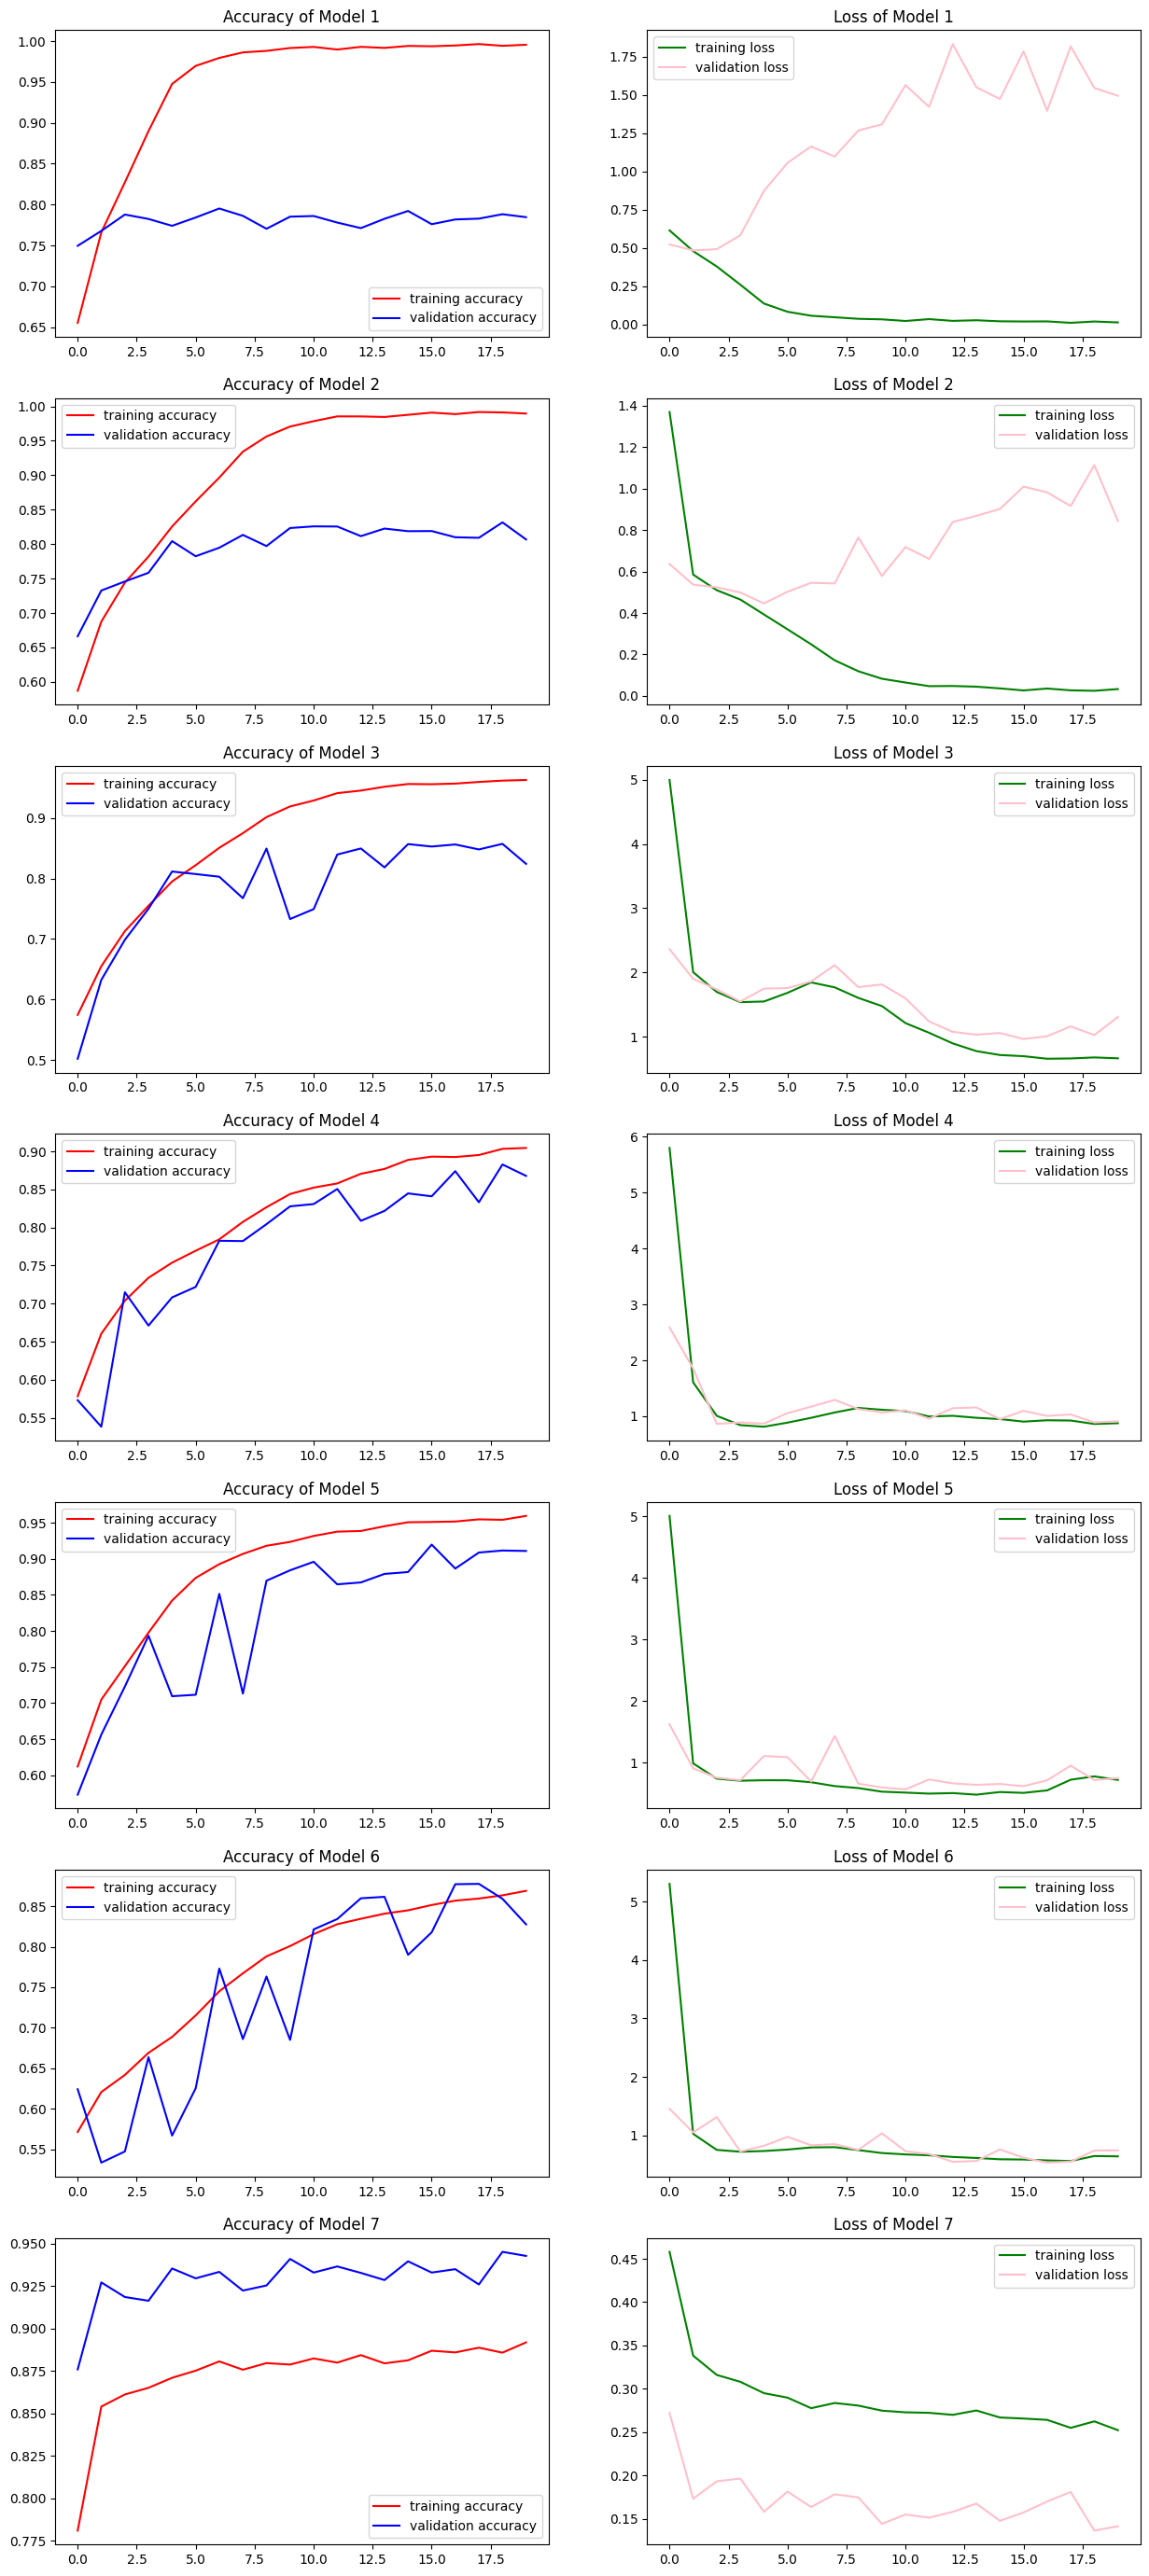

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 35))

historys = [history1, history2, history3, history4, history5, history6, history7]
i, j = 1, 1

for hist in historys: 
    plt.subplot(7, 2, i)
    plt.plot(hist.history['accuracy'], color = 'red', label = 'training accuracy')
    plt.plot(hist.history['val_accuracy'], color = 'blue', label = 'validation accuracy')
    plt.title(f'Accuracy of Model {j}')
    plt.legend()
    
    plt.subplot(7, 2, i + 1)
    plt.plot(hist.history['loss'], color = 'green', label = 'training loss')
    plt.plot(hist.history['val_loss'], color = 'pink', label = 'validation loss')
    plt.title(f'Loss of Model {j}')
    plt.legend()
    
    i += 2
    j += 1

plt.show()

# **Predictions**

(316, 315, 3)

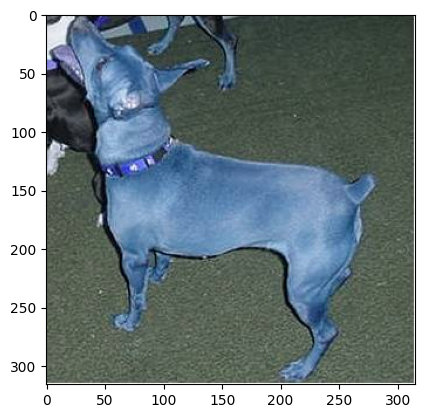

In [76]:
import cv2

testDogImage = cv2.imread("/kaggle/input/dogs-vs-cats/test/dogs/dog.10010.jpg")

plt.imshow(testDogImage)
testDogImage.shape

(391, 356, 3)

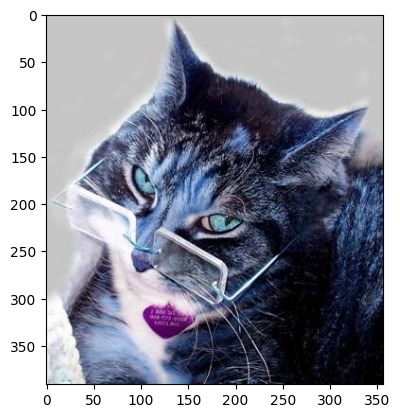

In [17]:
testCatImage = cv2.imread("/kaggle/input/dogs-vs-cats/test/cats/cat.10035.jpg")

plt.imshow(testCatImage)
testCatImage.shape

In [78]:
# Resizing test images to size that works with the model

testDogImage = cv2.resize(testDogImage, (256, 256))
testCatImage = cv2.resize(testCatImage, (256, 256))

# Model takes inputs in batches of 32, so we're specifying that this batch contains only 1 image

testInput1 = testDogImage.reshape((1, 256, 256, 3))
testInput2 = testCatImage.reshape((1, 256, 256, 3))

print(testDogImage.shape, testCatImage.shape)

(256, 256, 3) (256, 256, 3)


## Making Predictions

In [71]:
outputClasses = {0: "Car", 1: "Doggo"} # the internet loves to refer to cats as 'cars'

In [72]:
pred1 = vggCNN.predict(testInput1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [73]:
pred2 = vggCNN.predict(testInput2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [74]:
print(f'Test Image 1: {outputClasses[int(pred1)]}\nTest Image 2: {outputClasses[int(pred2)]}')

Test Image 1: Doggo
Test Image 2: Car


/tmp/ipykernel_35/17036169.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'Test Image 1: {outputClasses[int(pred1)]}\nTest Image 2: {outputClasses[int(pred2)]}')


Seems correct, of course :P

# Summary

- Model 1 is a basic CNN for introductory purposes.
- Model 2 shows how Batch Normalisation, Dropout increases validation accuracy quite a bit. This is a type of regularisation.
- Model 3 tries L1 regularisation, while Model 4 tries L2 regularisation.
- Model 5 is a complex CNN that does quite well. It has a lot of convolutional layers that're able to gather a lot of information from the dataset.
- Model 6 demonstrates some data augmentation techniques.
- Model 7 uses the concept of transfer learning. The renowned VGG16 gives great accuracy.

## Notes
- If you observe the model fitting process of some models (for example, CNN Model #4), then you'll notice that the model reached a certain peak in accuracy during training, but when the number of epochs ended, it was nowhere near that peak. To fix this, we can use callback functions like 'Early Stopping' and 'Model Checkpoint'. 
- You have to be extremely patient with Deep Learning. You have to keep evaluating model performance, fine-tune/update weights/layers and just find out what works and what doesn't. All this can be time-consuming, but it has to be done! So don't worry about taking your time.

# Thanks!
For checking this out.
Hopefully, you learnt something new here.

Feel free to connect!
Here's my <a href = "https://linktr.ee/adityapathakk">Linktree</a> which contains the links to everywhere you can find me!<br>
For quick access, here's my <a href = "https://www.linkedin.com/in/adityapathakk/">LinkedIn</a>.

Have a great day!